**SUPPORT VEKTOR REGRESION**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [13]:
#EDA
# Load the dataset
dataset = pd.read_csv("diamonds.csv")

# Select features and target
X = dataset[['carat']]
y = dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Yang dilakukan adalah memuat dataset dari file CSV.Memilih fitur (X) dan target (y) yang akan digunakan.Membagi dataset menjadi set latih dan uji menggunakan train_test_split dengan proporsi 80:20.

# Processing Data

In [14]:
#Processing
# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape for SVR
X_test_scaled = sc_X.transform(X_test)
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).ravel()  # Reshape for SVR

Di sini dilakukan penskalaan fitur dan target menggunakan StandardScaler untuk persiapan dalam pemodelan menggunakan algoritma Support Vector Regression (SVR).

# Modelling Linear

In [15]:
# Fitting SVR with linear kernel to the dataset
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X_train_scaled, y_train_scaled)

# Predicting the Test set results with linear kernel
y_pred_scaled_linear = regressor_linear.predict(X_test_scaled)
y_pred_linear = sc_y.inverse_transform(y_pred_scaled_linear.reshape(-1, 1))

# Handling missing values in y_test
if y_test.isnull().values.any():
    # If there are missing values, remove the corresponding rows
    y_test = y_test.dropna()
    X_test = X_test[y_test.index]  # Adjust X_test accordingly
    print("Missing values in y_test have been removed.")

# Model evaluation with linear kernel
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Kernel - Mean Squared Error:", mse_linear)
print("Linear Kernel - R-squared:", r2_linear)

Linear Kernel - Mean Squared Error: 2567648.1981319925
Linear Kernel - R-squared: 0.8384804027645074


Di sini, dilakukan pelatihan model SVR dengan kernel linear pada data latih yang telah di-skala. Kemudian, dilakukan prediksi pada data uji, diikuti dengan evaluasi kinerja model menggunakan metrik Mean Squared Error (MSE) dan R-squared. Jika terdapat nilai yang hilang pada data uji, nilai-nilai tersebut dihapus dan model dievaluasi kembali.

Hasilnya menunjukkan bahwa Mean Squared Error (MSE) sebesar 2,567,648.20 menunjukkan bahwa ada variasi yang signifikan antara nilai prediksi dan nilai sebenarnya pada data uji. Meskipun nilai ini tidak terlalu rendah, namun dapat diterima tergantung pada domain masalah dan konteks aplikasinya.

R-squared (R^2) sebesar 0.838 menunjukkan bahwa model mampu menjelaskan sekitar 83.8% variabilitas dari nilai target. Ini menandakan bahwa model cukup baik dalam menjelaskan hubungan antara fitur dan target.

Dengan demikian, meskipun masih ada ruang untuk perbaikan, model SVR dengan kernel linear memberikan hasil yang cukup memuaskan dalam memprediksi harga berlian berdasarkan berat karatnya.

## Visualisasi Linear

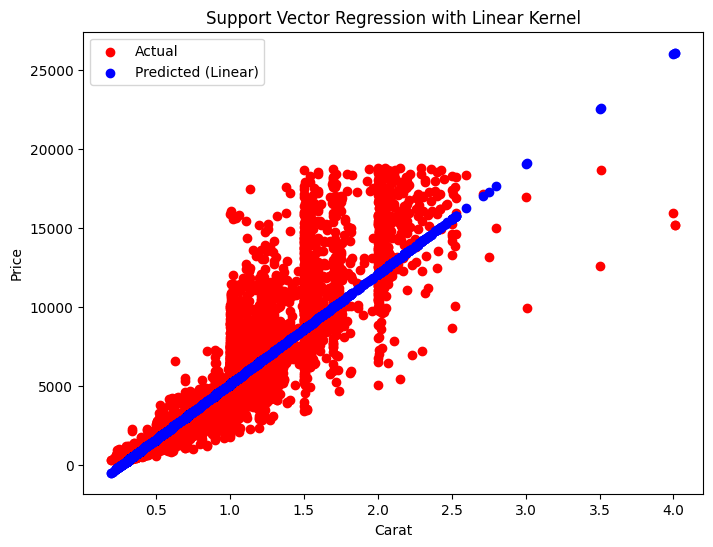

In [16]:

# Visualizing the SVR results with linear kernel
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_linear, color='blue', label='Predicted (Linear)')
plt.title('Support Vector Regression with Linear Kernel')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

Dari gambar didapatkan bahwa : SVR telah dilatih pada dataset dengan fitur (X) dan nilai kontinu yang ingin diprediksi (Y).
Fungsi regresi SVR telah dihitung, yang meminimalkan jarak ke sebagian besar titik data sambil tetap berada dalam zona toleransi error (epsilon).

# Modelling RBF

In [17]:
# Fitting SVR with non-linear (RBF) kernel to the dataset
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train_scaled, y_train_scaled)

# Predicting the Test set results with non-linear (RBF) kernel
y_pred_scaled_rbf = regressor_rbf.predict(X_test_scaled)
y_pred_rbf = sc_y.inverse_transform(y_pred_scaled_rbf.reshape(-1, 1))

# Model evaluation with non-linear (RBF) kernel
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)
print("\nRBF Kernel - Mean Squared Error:", mse_rbf)
print("RBF Kernel - R-squared:", r2_rbf)


RBF Kernel - Mean Squared Error: 2080662.9086372997
RBF Kernel - R-squared: 0.8691145324229308


Kode diatas adalah langkah untuk menguji model SVR untuk RBF dimana akan dilakukan

Fitting Model: Model SVR dengan kernel non-linear (RBF) diterapkan ke data latih yang telah discaling sebelumnya.

Predictions: Model yang telah dilatih digunakan untuk membuat prediksi pada data uji.

Evaluation: Kinerja model dievaluasi menggunakan mean squared error (MSE) dan R-squared (R^2). Semakin kecil MSE dan semakin tinggi R^2, semakin baik kinerja model.

Hasilnya menunjukkan  model Support Vector Regression (SVR) dengan kernel non-linear (RBF) memiliki nilai Mean Squared Error (MSE) sebesar 2080662.91 dan R-squared sebesar 0.869. Ini menunjukkan bahwa model RBF memberikan estimasi harga berlian yang lebih akurat daripada model linear, dengan kemampuan menjelaskan variasi sebesar 86.91%.

## Visualisasi RBF

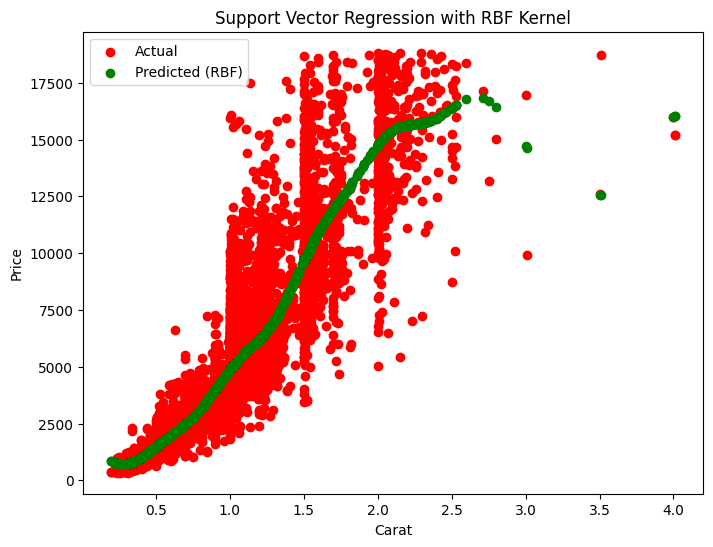

In [18]:
# Visualizing the SVR results with non-linear (RBF) kernel
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_rbf, color='green', label='Predicted (RBF)')
plt.title('Support Vector Regression with RBF Kernel')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

#KESIMPULAN

kedua model Support Vector Regression (SVR) dengan kernel linear dan kernel non-linear (RBF) telah dievaluasi menggunakan metrik Mean Squared Error (MSE) dan R-squared.

Untuk model dengan kernel linear, MSE sebesar 2567648.198 dan R-squared sebesar 0.838.
Sedangkan untuk model dengan kernel non-linear (RBF), MSE sebesar 2080662.909 dan R-squared sebesar 0.869.

Dari nilai-nilai tersebut, dapat disimpulkan bahwa model dengan kernel non-linear (RBF) memberikan hasil yang sedikit lebih baik dibandingkan dengan model linear dalam memprediksi harga berlian berdasarkan fitur karat (carat).


**Untuk visualisasi :**

Kernel linear lebih sederhana dan efisien, tetapi tidak cocok untuk data kompleks.
Kernel RBF lebih kompleks dan membutuhkan lebih banyak sumber daya, tetapi dapat memberikan akurasi yang lebih tinggi untuk data kompleks.